In [1]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

In [2]:
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500, 1000, 5000]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)
print(data[:20])

[1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0]


Aside - if we observe 550 heads on 1,000 tosses, is our coin fair?

In [3]:
n, p = 1000, 0.5
stats.binom.rvs(n, p, size=10)

array([492, 489, 519, 526, 499, 535, 513, 500, 536, 511])

In [4]:
1 - stats.binom.cdf(550, n, p)

0.0006958707972113398

In [5]:
stats.binom.cdf(450, n, p)

0.0008652680424885023

In [6]:
stats.binom.cdf(450, n, p) + 1 - stats.binom.cdf(550, n, p)

0.0015611388396998827

A 0.15% chance of being fair... can we estimate this without a `cdf` function?...

In [7]:
m, v, s, k = stats.binom.stats(n, p, moments='mvsk')
print(m, v, s, k)

500.0 250.0 0.0 -0.002


(array([  5.,  20.,  70., 165., 260., 261., 138.,  60.,  15.,   6.]),
 array([450. , 460.2, 470.4, 480.6, 490.8, 501. , 511.2, 521.4, 531.6,
        541.8, 552. ]),
 <a list of 10 Patch objects>)

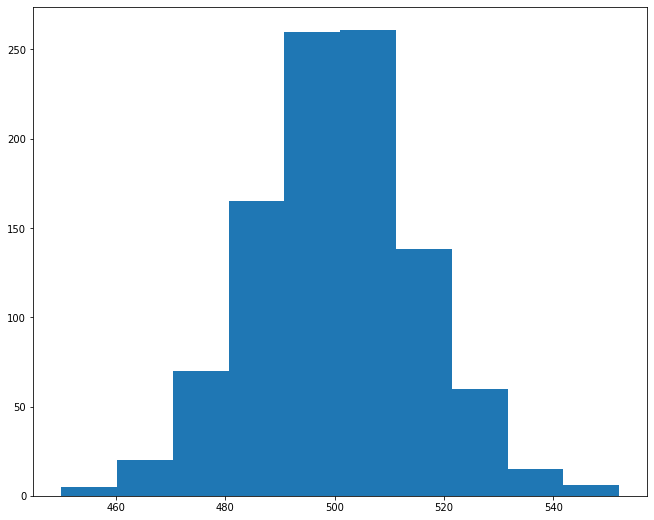

In [8]:
plt.hist(stats.binom.rvs(n, p, size=1000))

In [9]:
250 / np.sqrt(1000)

7.905694150420948

In [10]:
n * p * (1 - p)

250.0

In [11]:
50. / (250 / np.sqrt(1000))

6.324555320336759

In [17]:
1 - (stats.norm.cdf(-1) + 1 - stats.norm.cdf(1))

0.6826894921370857

In [18]:
stats.norm.cdf(-6.3) + 1 - stats.norm.cdf(6.3)

2.9764557485378873e-10

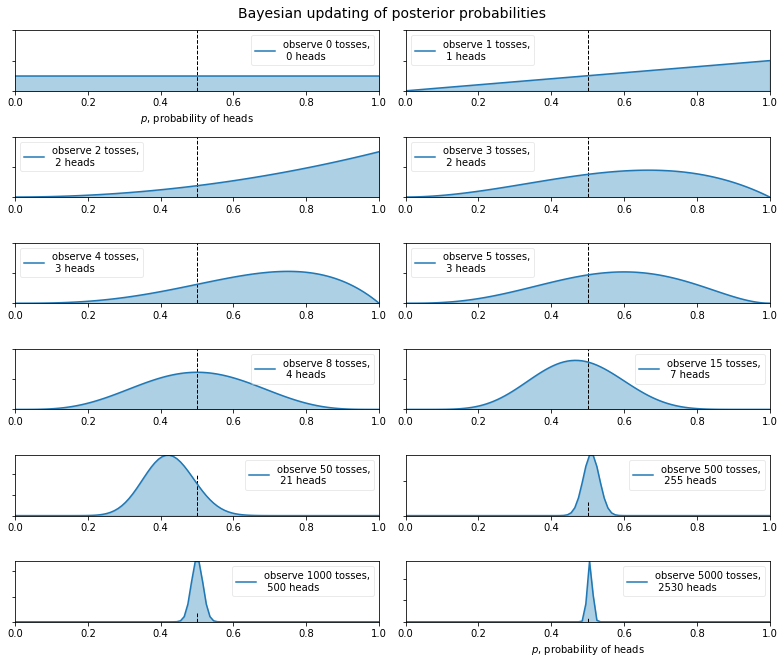

In [19]:
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    
plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

Buggy code?...

Text(0.5, 1.0, 'Are there bugs in my code?')

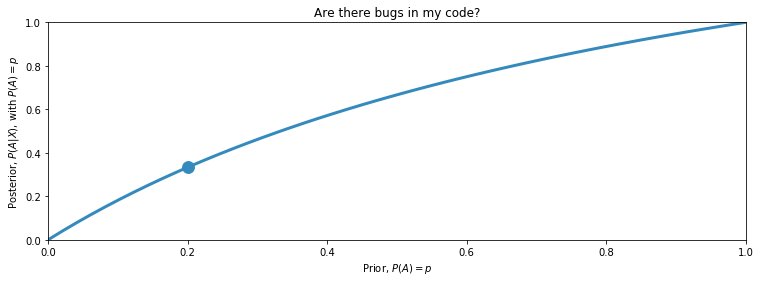

In [20]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2*p/(1+p), color="#348ABD", lw=3)
plt.scatter(0.2, 2*(0.2)/1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Are there bugs in my code?")

This is for a prior of $P(A) = p$ being the probability a program has no bugs. $X$ is the event our code passes all debugging tests. So the probability of the program having no bugs given it passes all the tests climbs the most for lower values of the prior (lower initial estimates that the code is bug free).

In [21]:
def f(p):
    return 2 * p / (1 + p)

In [23]:
print(f(.2))
print(f(.8))

0.33333333333333337
0.888888888888889


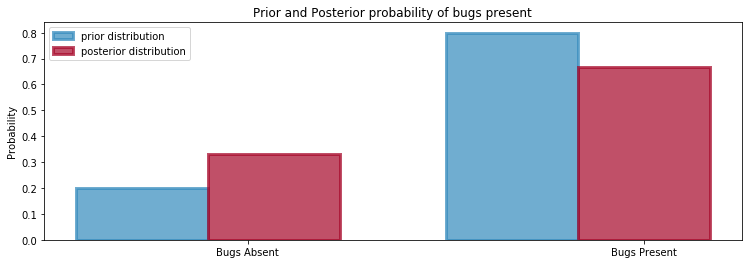

In [26]:
figsize(12.5, 4)
colors = ["#348ABD", "#A60628"]

prior = [0.2, 0.8]  # prior for [bugs absent, bugs present]
posterior = [f(.2), 1-f(.2)]
plt.bar([0, 0.7], prior, alpha=0.7, width=0.25, color=colors[0], label="prior distribution",
       lw="3", edgecolor=colors[0])
plt.bar([0+0.25, 0.7+0.25], posterior, alpha=0.7, width=0.25, color=colors[1], label="posterior distribution",
       lw="3", edgecolor=colors[1])

plt.xticks([0.2, 0.95], ["Bugs Absent", "Bugs Present"])
plt.title("Prior and Posterior probability of bugs present")
plt.ylabel("Probability")
plt.legend(loc="upper left")

Poisson probability mass function...